# Introdução à biblioteca NetworkX e à Programação Inteira com SCIP

## A biblioteca NetworkX para manipulação de grafos.

A biblioteca `NetworkX` diponibiliza implementações de vários tipos de grafos e de muitos algoritmos para os analisar e visualizar. Para importar esta biblioteca de forma qualificada faz-se o seguinte.

In [1]:
import networkx as nx

O tutorial desta biblioteca pode ser encontrado em https://networkx.github.io/documentation/stable/tutorial.html.

### Exercício 1

Um grafo *orientado* e *não pesado* é um par $(V,E)$ onde $V$ é um conjunto finito de vértices e $E$ uma relação binária em $V$, o conjunto de *arcos* ou *arestas* do grafo.

Um grafo *não pesado* pode ser representado usando *listas de adjacências*. Em Python é
possível implementar as ditas usando um dicionário de listas, onde a cada vértice temos associada a sua lista
de adjacentes (vértices directamente ligados através de uma aresta).

Se o grafo for também *não orientado* bastará desdobrar cada aresta em duas adjacências.

Por exemplo, o grafo

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/320px-6n-graf.svg.png" width=200/>


pode ser armazenado no dicionário `adj` da seguinte forma.

In [2]:
adj = {1:[2,5],2:[1,3,5],3:[2,4],4:[3,5,6],5:[1,2,4],6:[4]}

Implemente uma função `converte` que converte um grafo implementando com dicionários do python para um grafo do NetworkX.

In [3]:
# completar
def converte(adj):
#1º criar grafo
    g = nx.Graph()
#2º adicionar vertice
#3ºadicionar caminho
    for vertice in adj:
        g.add_node(vertice)
        for a in adj[vertice]: # agora olhando para os values da respetiva key adiciona caminho aos vertices
            g.add_edge(vertice,a)
    return g
graph = converte(adj)
nx.to_dict_of_lists(graph) # converte o grafo para um dicionario de listas

{1: [2, 5], 2: [1, 3, 5], 5: [1, 2, 4], 3: [2, 4], 4: [3, 5, 6], 6: [4]}

A biblioteca `NetworkX` disponibiliza muitos algoritmos para analisar grafos. Por exemplo, a função `shortest_path` dá o caminho mais curto entre dois vértices.

In [4]:
nx.shortest_path(graph,1,3)

[1, 2, 3]

 A função `diameter` permite saber o diâmetro de um grafo (i.e., a distância entre os seus vértices mais afastados).

In [5]:
nx.diameter(graph) # entre 1 e 6(vertices mais afastados temos o caminho mais longo com 3 vertices 2,3 e 4 dai o diametro)

3

Também podemos utilizar as bibliotecas `NetworkX` e `Matplotlib` (`pip install matplotlib`) para desenhar o grafo exemplo (conforme explicado em https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs).

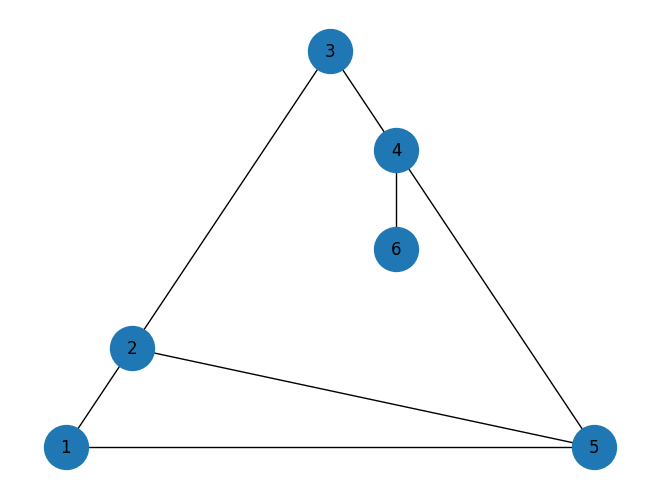

In [6]:
nx.draw(graph,pos=nx.planar_layout(graph),with_labels=True,node_size=1000)

### Exercício 2

A biblioteca `NetworkX` disponibiliza também vários geradores de grafos pré-definidos, conforme documentação em https://networkx.github.io/documentation/stable/reference/generators.html.
    Use esses geradores para criar um grafo degenerado que é um ciclo com 100 vértices. 
    Desenhe esse grafo e calcule o seu diâmetro 
    (que deverá ser 50).

50

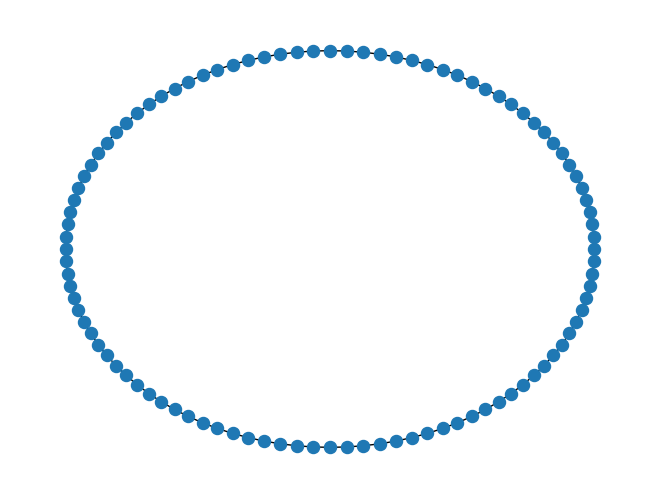

In [7]:
# completar
gciclo = nx.cycle_graph(100)
#nx.draw(gciclo,with_labels=True,node_size = 1000)  este nao dava um circulo
nx.draw(gciclo,pos=nx.circular_layout(gciclo),with_labels=False,node_size = 75)
#nx.draw_circular(gciclo, node_size=75) esta dá igual à anterior

nx.diameter(gciclo)

Os vértices e as arestas de um grafo em `NetworkX` podem ter atributos. Por exemplo, podemos usar o atributo `color` para definir a cor de cada vértice. Os atributos podem ser definidos de muitas formas, por exemplo, usando a função `set_node_attributes`. O código seguinte começa por gerar o grafo de Petersen, um conhecido grafo com 10 vértices (https://en.wikipedia.org/wiki/Petersen_graph), usando a função `petersen_graph`. Depois define o atributo `color` de todos os vértices com a cor `red`.

In [8]:
petersen = nx.petersen_graph() # gera um grafo conhecido de problemas que irão surgir
nx.set_node_attributes(petersen,'red','color') 
print(petersen.nodes.data()) # damos print dos dados apenas
#nx.draw(petersen) nao pinta como se irá ver abaixo

[(0, {'color': 'red'}), (1, {'color': 'red'}), (2, {'color': 'red'}), (3, {'color': 'red'}), (4, {'color': 'red'}), (5, {'color': 'red'}), (6, {'color': 'red'}), (7, {'color': 'red'}), (8, {'color': 'red'}), (9, {'color': 'red'})]


É possível alterar ou acrescentar um atributo a um vértice acedendo ao respectivo dicionário de atributos.

In [9]:
petersen.nodes[0]['color'] = 'yellow'
print(petersen.nodes.data())

[(0, {'color': 'yellow'}), (1, {'color': 'red'}), (2, {'color': 'red'}), (3, {'color': 'red'}), (4, {'color': 'red'}), (5, {'color': 'red'}), (6, {'color': 'red'}), (7, {'color': 'red'}), (8, {'color': 'red'}), (9, {'color': 'red'})]


Infelizmente, a função `draw` não tem este atributo em consideração.

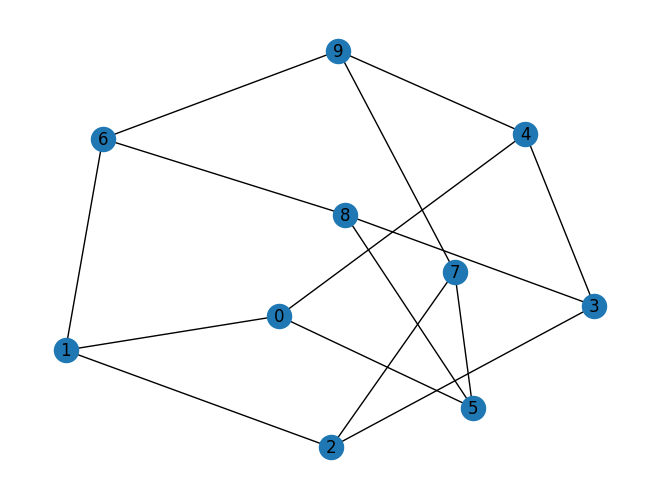

In [10]:
nx.draw(petersen,with_labels=True)

Um dos parâmetros da função `draw` é o `node_color`, que permite definir uma cor para todos os vértices ou passar uma lista com uma cor diferente para cada vértice.

### Exercício 3

Defina uma função `draw_with_colors` que, dado um grafo onde os vértices têm o atributo `color` definido, desenhe esse grafo tendo as cores nesse atributo em consideração.

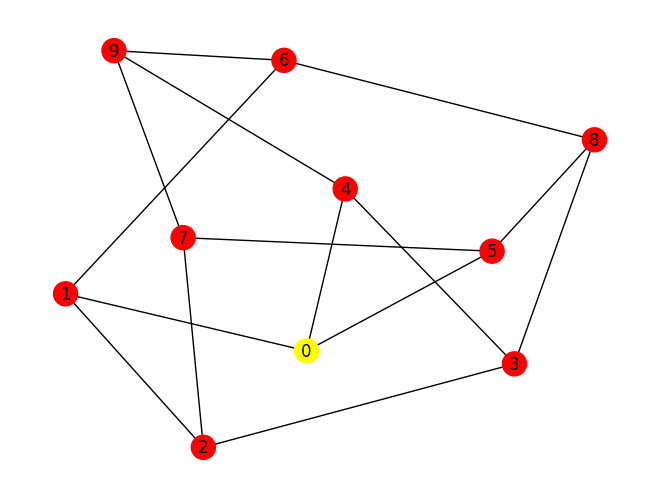

In [11]:
def draw_with_colors(graph):
    # completar
                                                # atraves de uma lista em comprensão
    nx.draw(petersen,with_labels=True,node_color=[ graph.nodes[vertice]['color'] for vertice in graph] )
    
draw_with_colors(petersen)

## Breve introdução à utilização do SCIP em Python

A documentação do OR-Tools pode ser encontrada em https://developers.google.com/optimization/introduction/overview.

Para resolver um problema de programação inteira com esta biblioteca é necessário seguir uma série de passos:
1. Importar a biblioteca de programação linear do OR-Tools usando o comando `from ortools.linear_solver import pywraplp`
1. Criar uma instância do *solver* com o método `pywraplp.Solver.CreateSolver('SCIP')`.
1. Adicionar as variáveis do problema. Para criar uma variável inteira deve ser usado o método `IntVar` que recebe 3 parâmetros: o limite inferior, o limite superior, e o nome da variável. Na definição dos limites pode ser usada a constante `solver.infinity()`. O método `NumVar` pode ser usado para criar uma variável contínua, e o método `BoolVar` para criar uma variável inteira binária. Neste último caso, o método só tem um parâmetro que é o nome da variável, sendo os limites pré-definidos como 0 e 1.
1. Adicionar as restrições do problema usando o método `Add`. A restrição é definida com a sintaxe normal Python, podendo também ser usada a função `sum` para fazer o somatório de uma lista de expressões aritméticas.
1. Definir o objectivo do problema com os métodos `Maximize` ou `Minimize`, que recebem como parâmetro a função objectivo. Mais uma vez a função objectivo é definida com a sintaxe usual do Python. Este passo é opcional: se não for definido um objectivo será calculada uma qualquer solução.
1. Invocar o solver com o método `Solve`. Este método pode devolver um dos seguintes códigos:
  - `pywraplp.Solver.OPTIMAL`, quando é possível resolver o problema.
  - `pywraplp.Solver.INFEASIBLE`, quando não é possível resolver o problema.
  - `pywraplp.Solver.UNBOUNDED`, quando a solução não está limitada superiormente (no caso do `Maximize`) ou inferiormente (no caso do `Minimize`).
1. Interpretar os resultados no caso do resultado ser `pywraplp.Solver.OPTIMAL`. Para saber o valor de uma variável pode ser usado o método `solution_value`, que devolve sempre um `double`. Também é possível aceder à função objectivo com o método `Objective` e ao respectivo valor com o método `Value`. Para converter o valor do tipo `double` para um `int` deve ser usada a função `round`, pois o valor pode sofrer de pequenos erros de precisão.

Por exemplo, o programa seguinte tenta encontrar $x$ e $y$ que minimizem $3x+4y$ satisfazendo as seguintes restrições:

$$
\left\{
\begin{array}{l}
5x + 6y \ge 11\\
7x + 5y \ge 5\\
x \ge 0\\
y \ge 0
\end{array}
\right.
$$

In [12]:
# Importar biblioteca
from ortools.linear_solver import pywraplp
# Criar instância do solver
solver = pywraplp.Solver.CreateSolver('SCIP')
# Adicionar variáveis
x = solver.IntVar(0.0,solver.infinity(),"x")
y = solver.IntVar(0.0,solver.infinity(),"y")
# Adicionar restrições
solver.Add(5*x + 6*y >= 11)
solver.Add(7*x + 5*y >= 5)
# Definir objectivo
solver.Minimize(3*x + 4*y)
# Invocar o solver
status = solver.Solve()
# Interpretar os resultados
if status == pywraplp.Solver.OPTIMAL:
    print ("x = ",round(x.solution_value()))
    print ("y = ",round(y.solution_value()))
    print ("objectivo = ",round(solver.Objective().Value()))

x =  1
y =  1
objectivo =  7


## O problema da coloração de grafos

O problema da *coloração de grafos* (https://en.wikipedia.org/wiki/Graph_coloring) consiste em descobrir uma atribuição de cores aos vértices, de tal forma que vértices adjacentes não tenham a mesma cor. Temos duas variantes deste problema:
- Problema de decisão: dado um grafo e um número não negativo $k$ determinar se é possível colorir o grafo com no máximo $k$ cores, devolvendo uma coloração válida se tal for possível.
- Problema de optimização: dado um grafo determinar o menor $k$ para o qual isso é possível (o *número cromático* do grafo).

Por exemplo, o grafo de Petersen tem número cromático 3.

### Exercício 4

Defina a função `valid_color` que testa se um grafo tem uma coloração válida.

In [13]:
def valid_color(graph):
    # completar
    for v in graph:
        for a in graph[v]:
            if graph.nodes[v]['color']== graph.nodes[a]['color']: # se a cor de v e a forem iguais dará falso
                return False
    return True
    
assert not valid_color(petersen) # como a coloraçãoi naoé valida retorna True

## Modelação da coloração de grafos com Programação Inteira

É possível usar programação inteira para resolver o problema de colorir um grafo $(V,E)$ com $k$ cores. Para tal, vamos necessitar de $|V| \times k$ variáveis inteiras binárias, onde a variável $x_{v,c}$ determina se o vértice $v$ tem cor $c$. Temos também as seguintes restrições:

1. Para cada aresta $(o,d) \in E$ e cor $0 <= c < k$, $o$ e $d$ não podem ter ambos a cor $c$.
1. Cada vértice $v$ tem exactamente uma cor.

### Exercício 5

Indique as fórmulas que modelam estas duas restrições.

$ \forall_{o,d}\in E, \forall c<k\; x_{o,c} +x_{d,c} <=1 $
$ \forall v \in V \sum_{c=0}^{k-1}x_{v,c}=1 
      $


### Exercício 6

Defina a seguinte função que testa se é possível colorir um grafo com $k$ cores usando o OR-Tools com o *solver* SCIP. Se for possível, deve guardar a coloração no grafo (no atributo `color`). Sugere-se que use um dicionário `x` para guardar as varáveis, sendo que em `x[v][c]` será armazenada a variável $x_{v,c}$. Para criar um nome único para as variáveis sugere-se que use a [primitiva de formatação posicional do Python similar ao `printf`](https://docs.python.org/3/library/stdtypes.html#old-string-formatting). Por exemplo, pode usar a expressão `'x[%i][%i]' % (v,c)` para criar o nome para a variável em ``x[v][c]``.

[(0, {'color': 0}), (1, {'color': 'red'}), (2, {'color': 'red'}), (3, {'color': 'red'}), (4, {'color': 'red'}), (5, {'color': 'red'}), (6, {'color': 'red'}), (7, {'color': 'red'}), (8, {'color': 'red'}), (9, {'color': 'red'})]


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [0, 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']

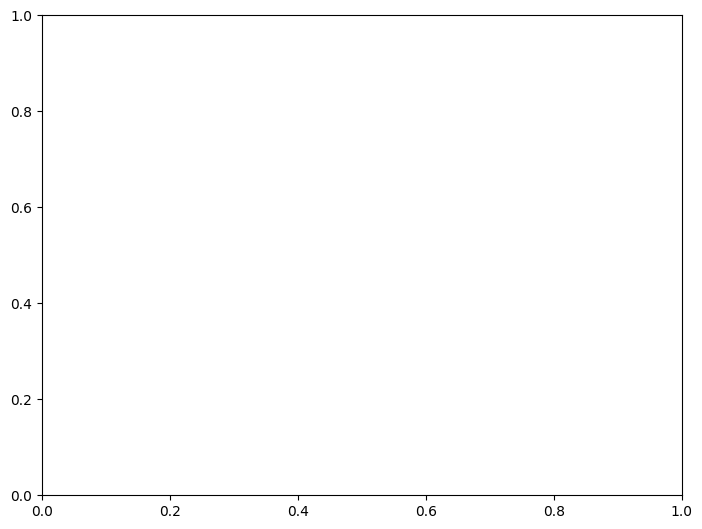

In [14]:
def ip_color(graph,k):
    s = pywraplp.Solver.CreateSolver('SCIP')
    
    x = {}
    for v in graph:
        x[v] = {}
        for c in range(k): # c -> color
            x[v][c] = s.BoolVar('x[%i][%i]' % (v,c)) # receber algo do tipo da expressão que tá em cima e guardamos o [vertice][cor]
    
    #cada vértice tem exatamente uma cor (2)
    for v in graph:
        s.Add(sum(list(x[v].values())) == 1)
        
    #Vértice adjacente têm cores diferentes (1 -> expressao da soma)
    for o in graph:
        for d in graph[o]: # lista de adjacência
            for c in range(k):
                #acrescenta-se a restrição
                s.Add(x[o][c] +x[d][c] <= 1)
    
    status = s.Solve()

    if status == pywraplp.Solver.OPTIMAL: # se ocorrer isto temos de colorir o grafo
        for v in graph:
            for c in range(k):
                    #saber a cor do x(v,c) atraves de solution... e usar round para nao dar problemas
                    # se a cor for 1 temos de alterar a cor, caso contrário não
                    if round(x[v][c].solution_value()) == 1:
                        graph.nodes[v]['color'] = c
                        return True
                    return False
    #caso nao seja OPTIMAL
        
                
assert ip_color(petersen,3) # verifica se é possivel colorir com 3 cores
print(petersen.nodes.data())
draw_with_colors(petersen) # e desenha o grafo colorido mas dá uns erros verificar o que é

### Exercício 7

Como o SCIP suporta problemas de optimização em programação inteira, podemos implementar directamente o problema de optimização da coloração de grafos sem usar um método de pesquisa linear que tenta todos os possíveis números cromáticos. O objectivo deste exercício é implementar este problema em SCIP, ou seja, determinar uma coloração válida que minimize o número de cores.

Sugere-se que, para além das variáveis binárias que usou no exercício 4, utilize uma variável binárias $u_c$ por cada cor $c$ possível (note que num grafo o número máximo de cores necessário será idêntico ao número de vértices). Esta variável deve ter o valor 1 sse a cor $c$ for usada nalgum vértice. Dado este conjunto de variáveis o objectivo da optimização será minimizar:

$$
\sum_c u_c
$$

O valor de cada variável $u_c$ pode ser definido como o valor máximo das variáveis $x_{v,c}$ para todo o vértice $v$.

In [29]:
def ip_find_optimal_coloring(graph):
    s = pywraplp.Solver.CreateSolver('SCIP')
    k = len(graph)
    
    x={}
    for v in graph:
        x[v]={}
        for c in range(len(graph)):
            x[v][c] = s.BoolVar('x[%i][%i]' % (v,c))
            
    u = {}
    for c in range(k):
        u[c]=s.BoolVar(f'u[{c}]')
        
    #Restriçao 1 caderno  
    for v in graph:
        for c in range(k):
            s.Add(x[v][c] <= u[c])
            
    #cada vertice tem exatamente uma cor
    for v in graph:
        s.Add(sum(list(x[v].values()))==1)
        
    # vertices adjacentes têm cores diferentes
    for o in graph:
        for d in graph(o):
            for c in range(k):
                s.Add(x[o][c] + x[d][c] <= 1)
    
    # MInimizando a função objetivo ver caderno (2)
    s.Minimize(sum(u.vcalues()))
    
    status = s.Solve()
    if status == pywraplp.Solver.OPTIMAL:
        #colorindo o grafo
        for v in graph:
            for c in range(k):
                if round(x[v][c].solution.value()) == 1:
                         graph.nodes[v]['color'] = c
        return round(s.Objective().Value())
    return aaa

assert ip_find_optimal_coloring(petersen) == 3
draw_with_colors(petersen)

TypeError: 'Graph' object is not callable

## Um problema de alocação

Os problemas de alocação modelam uma relação entre dois tipos de entidades: compromissos e recursos. Adicionalmente, as restrições sobre a alocação de recursos a compromissos classificam-se em dois tipos: obrigações e limitações.

Vamos agora considerar um pequeno problema de alocação. Pretende-se que faça a modelação do problema em Programação Inteira e que use o SCIP para o resolver.

### Regime de trabalho híbrido

Uma empresa quer colocar todos os seus colaboradores em regime de trabalho híbrido. Isto é, uns dias em teletrabalho e outros dias trabalho presencial. A empresa tem $P$ colaboradores e o número de dias de trabalho é $D$.

Este novo regime segue algumas restrições:
1. Cada colaborador tem de estar em trabalho presencial 2x por semana.
2. Cada dia deve ter pelo menos um colaborador em trabalho presencial.
3. Existe pelo menos um dia em que todos os colaboradores estão em trabalho presencial.

Este é um problema de alocação. Pretende-se definir os dias em que cada colaborador deve estar em trabalho presencial, de modo a obedecer às restrições estabelecidas.
Vamos usar uma família $x_{p,d}$ de variáveis binárias (i.e., que assumem valores inteiros $\{0,1\}$), com a seguinte semântica

$$x_{p,d} = 1 \quad \mathbf{sse} \quad \mbox{o colaborador $p$ está em trabalho presencial no dia $d$} $$

Estas $P\times D$ variáveis são convenientemente representadas numa matriz $X$ instanciável com valores 
$\{0,1\}^{P\times D }$, a que se costuma chamar *matriz de alocação*.


Começamos por importar a biblioteca de programação linear do OR-Tools, criar uma instância do *solver*
e definir os valores para as constantes $P$ e $D$. De seguida temos que declarar a matriz de alocação $X$.

In [24]:
from ortools.linear_solver import pywraplp

solver = pywraplp.Solver.CreateSolver('SCIP')

P = 5 # número de colaboradores
D = 5 # número de dias

### Exercício 8

Complete a declaração da matriz de alocação $X$ como um dicionário.

In [28]:
X = {}
# completar
for p in range(P):
    for d in range(D):
        X[p,d] = solver.BoolVar(f'X[{p}][{d}]')

{(0, 0): X[0][0], (0, 1): X[0][1], (0, 2): X[0][2], (0, 3): X[0][3], (0, 4): X[0][4], (1, 0): X[1][0], (1, 1): X[1][1], (1, 2): X[1][2], (1, 3): X[1][3], (1, 4): X[1][4], (2, 0): X[2][0], (2, 1): X[2][1], (2, 2): X[2][2], (2, 3): X[2][3], (2, 4): X[2][4], (3, 0): X[3][0], (3, 1): X[3][1], (3, 2): X[3][2], (3, 3): X[3][3], (3, 4): X[3][4], (4, 0): X[4][0], (4, 1): X[4][1], (4, 2): X[4][2], (4, 3): X[4][3], (4, 4): X[4][4]}


Passamos agora à modelação das restrições e à sua introdução no *solver*.

A restrição

1. Cada colaborador tem de estar em trabalho presencial 2x por semana.

pode expressar-se da seguinte forma:

$$
\forall p < P.\;\sum_{d < D} x_{p,d} = 2
$$


In [30]:
# qualquer pessoa tem  de estar exatamente 2x daí o "= 2" e vamos chegar a tal com o somatorio de x_{p,d} em cada dia d
for p in range(P):
    solver.Add(sum([ X[p,d] for d in range(D) ]) == 2)

### Exercício 9
Apresente a fórmula que modela a segunda restrição e acrescente-a ao problema.

2. Cada dia deve ter pelo menos um colaborador em trabalho presencial.

$ \forall_{d<D} \dot \sum_{p} X_{p,d} \geq 1$

In [35]:
for d in range (D):
    solver.Add(sum([ X[p,d] for p in range(P)]) >= 1)

### Exercício 10
Queremos agora acrescenatr a terceira restrição

3. Existe pelo menos um dia em que todos os colaboradores estão em trabalho presencial.

Esta restrição pode ser definida pela seguinte fórmula:
$$
\exists_{d<D}. \sum_{p < P} x_{p,d} = P
$$
Que, por sua vez, é equivalente a:
$$
\bigvee_{d < D} \sum_{p < P} x_{p,d} = P
$$

Como podemos ver, esta restrição representa uma disjunção, que por norma não é suportada pelos *solvers* de programação inteira.
De forma a conseguir modelar esta restrição, 
podemos acrescentar uma família de variáveis binárias $u_d$ com a seguinte semântica: 

$$
u_d = 1 \quad \mathbf{sse} \quad \mbox{no dia $d$ todos os colaboradores estão em trabalho presencial}
$$

A nossa restrição pode agora ser modelada da seguinte forma:
$$
\sum_{d < D} u_d \geq 1
$$

Acrescente esta restrição ao solver.

In [38]:
U = {}    
for d in range(D):
    #declaramos as variaveis para cada dia d
    U[d] = solver.BoolVar(f'U[{d}]')
    
solver.Add(sum([U[d] for d in range(D)]) >= 1)
print() # remove o que o solver.Add(...) devolvia que é o valor do objeto solver

O valor de $u_{d}$ também deve alguma forma limitar inferiormente o número de colaboradores em trabalho presencial no dia $d$. Para isso, precisamos  de relacionar as variáveis $u_{d}$ e a matriz de alocação $X$ através da seguinte restrição:

$$
\forall_{d<D}. \; \sum_{p < P} x_{p,d} \geq u_d \times P
$$

Acrescente esta restrição ao solver.

In [41]:
for d in range (D):
    solver.Add(sum([ X[p,d] for p in range(P)]) >= U[d]*P)

Podemos agora ver a solução do solver para este problema.

In [40]:
status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print("X:")
    for p in range(P):
        for d in range(D):
            print(int(X[p,d].solution_value()), end=' ')
    
        print()

    print("U:")
    for d in range(D):
        print(int(U[d].solution_value()), end=' ')

X:
0 0 1 1 0 
0 1 0 1 0 
0 0 1 1 0 
1 0 0 1 0 
0 0 0 1 1 
U:
0 0 0 1 0 

Em X vemos os dias em que a cada "1" tem la um colaborador e em U: o "1" representa o dia em que todos os colaboradores estiverem em trabalho presencial